## Chapter 7
# Frequency Response Analysis

### Group Delay Examples

The following are a reproduction of Figures 7.5 and 7.6 in the book.  The charts compare the amplitude and group-delay responses of four classic lowpass filter types: Butterworth, Chebyshev Type I, Chebyshev Type II, and Elliptic Function.

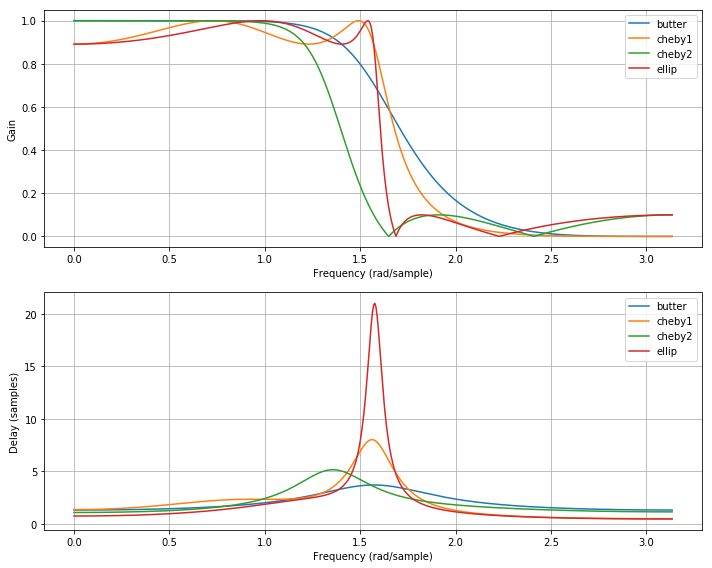

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, cheby1, cheby2, ellip, freqz, group_delay

%matplotlib inline

Bb, Ab = butter(4, 0.5) # order 4, cutoff at 0.5 * pi
_, Hb = freqz(Bb, Ab)
_, Db = group_delay((Bb, Ab))

Bc1, Ac1 = cheby1(4, 1, 0.5) # 1 dB passband ripple
_, Hc1 = freqz(Bc1, Ac1)
_, Dc1 = group_delay((Bc1, Ac1))

Bc2, Ac2 = cheby2(4, 20, 0.5) # 20 dB stopband attenuation
_, Hc2 = freqz(Bc2, Ac2)
_, Dc2 = group_delay((Bc2, Ac2))

Be, Ae = ellip(4, 1, 20, 0.5) # like cheby1 + cheby2
_, He = freqz(Be, Ae)
w, De = group_delay((Be, Ae))

plt.figure(figsize=(10, 8))
plt.subplot(211)
plt.plot(w, np.abs(Hb), label='butter')
plt.plot(w, np.abs(Hc1), label='cheby1')
plt.plot(w, np.abs(Hc2), label='cheby2')
plt.plot(w, np.abs(He), label='ellip')
plt.grid(True)
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Gain')
plt.legend()

plt.subplot(212)
plt.plot(w, np.abs(Db), label='butter')
plt.plot(w, np.abs(Dc1), label='cheby1')
plt.plot(w, np.abs(Dc2), label='cheby2')
plt.plot(w, np.abs(De), label='ellip')
plt.grid(True)
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Delay (samples)')
plt.legend()
plt.tight_layout()

## Frequency Response Analysis Problems

**1. Derive the frequency response for the two digital filters below:  
a) $y(n) = x(n-1) + x(n-2) + y(n-1)$**

$\begin{align}
H(e^{j\omega t}) &= \frac{B(e^{j\omega t})}{A(e^{j\omega t})} = \frac{\sum_\limits{m=0}^\limits{M}b_me^{-j\omega mT}}{\sum_\limits{n=0}^\limits{N}a_ne^{-j\omega mT}}\\
&= \frac{b_0 + b_1e^{-j\omega 1T} + b_2e^{-j\omega 2T}}{1+a_1e^{-j\omega 1T}}\\
&= \frac{0 + 1e^{-j\omega T} + 1e^{-j\omega 2T}}{1-1e^{-j\omega T}} = \frac{e^{-j\omega T} + e^{-j\omega 2T}}{1-e^{-j\omega T}} \\
&= \frac{e^{-j\omega T}(1 + e^{-j\omega T})}{1-e^{-j\omega T}} = \frac{e^{-j\omega T}(1 + e^{-j\omega T})}{e^{-j\omega T}(e^{j\omega T}-1)} = \frac{1 + e^{-j\omega T}}{e^{j\omega T}-1}\\
\end{align}$

(Note that this is undefined (infinite - has a pole) at $\omega = 0$.)

We can simplify this expression further and put it in polar form by "balancing the exponents":

$\begin{align}
H(e^{j\omega t}) &= \frac{1 + e^{-j\omega T}}{e^{j\omega T}-1}\\
&= \frac{(e^{j\omega T/2} + e^{-j\omega T/2})e^{-j\omega T/2}}{(e^{j\omega T/2}-e^{-j\omega T/2})e^{j\omega T/2}}\\
&= \frac{2\cos(\omega T / 2)e^{-j\omega T/2}}{2j\sin(\omega T / 2)e^{j\omega T/2}}\\
&= \frac{2\cos(\omega T / 2)e^{-j\omega T/2}}{2\sin(\omega T / 2)e^{j(\omega T/2 + \pi / 2)}}\\
&= \cot(\omega T/2)e^{-j\omega T/2 - j(\omega T/2 + \pi / 2)}\\
&= \cot(\omega T/2)e^{-j\omega T - \pi / 2}\\
\end{align}$


The amplitude response is thus

$\begin{align}
G(\omega) &= \left|\cot(\omega T/2)e^{-j\omega T - \pi / 2}\right|\\
&= \left|\cot(\omega T/2)\right|,\\
\end{align}$

and the phase response is

$\begin{align}
\Theta(\omega) &= \angle\cot(\omega T/2)e^{-j\omega T - \pi / 2}\\
&= -\omega T - \pi / 2
\end{align}$

**b) $y(n) = x(n) + x(n-1) + y(n-1)$**

$\begin{align}
H(e^{j\omega t}) &= \frac{1 + 1e^{-j\omega T}}{1-1e^{-j\omega T}} = \frac{1 + e^{-j\omega T}}{1-e^{-j\omega T}}\\
&= \frac{(e^{j\omega T/2} + e^{-j\omega T/2})e^{-j\omega T/2}}{(e^{j\omega T/2}-e^{-j\omega T/2})e^{-j\omega T/2}}\\
&= \frac{e^{j\omega T/2} + e^{-j\omega T/2}}{e^{j\omega T/2}-e^{-j\omega T/2}}\\
&= \frac{2\cos(\omega T/2)}{2j\sin(\omega T/2)}\\
&= \frac{2\cos(\omega T/2)}{2\sin(\omega T/2)e^{j\pi / 2}}\\
&= \cot(\omega T/2)e^{-j\pi / 2}\\
\end{align}$

(The response for this filter is _also_ undefined (infinite) at $\omega = 0$.)

Amplitude response:

$\begin{align}
G(\omega) &= \left|\cot(\omega T/2)\right|,\\
\end{align}$

Phase response:

$\begin{align}
\Theta(\omega) &= -\pi / 2
\end{align}$

**In what ways are these filters identical? How are they different?**

These filters have the same amplitude response, but the first filter has a _linear_ phase response while the second has a _constant_ phase response.

_Let's plot the responses just to verify this result:_

/usr/local/lib/python3.6/site-packages/scipy/signal/filter_design.py:444: RuntimeWarning: divide by zero encountered in true_divide
  npp_polyval(zm1, a, tensor=False))
/usr/local/lib/python3.6/site-packages/scipy/signal/filter_design.py:444: RuntimeWarning: invalid value encountered in true_divide
  npp_polyval(zm1, a, tensor=False))


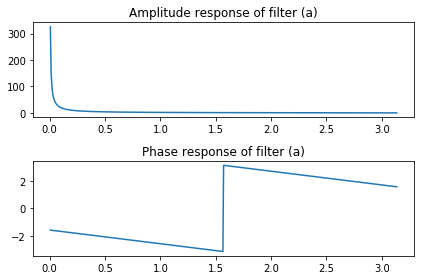

In [2]:
B = [0, 1, 1]
A = [1, -1]

w, h = freqz(B, A)
plt.subplot(211)
plt.plot(w, np.abs(h))
plt.title('Amplitude response of filter (a)')
plt.subplot(212)
plt.plot(w, np.angle(h))
plt.title('Phase response of filter (a)')
plt.tight_layout()

/usr/local/lib/python3.6/site-packages/scipy/signal/filter_design.py:444: RuntimeWarning: divide by zero encountered in true_divide
  npp_polyval(zm1, a, tensor=False))
/usr/local/lib/python3.6/site-packages/scipy/signal/filter_design.py:444: RuntimeWarning: invalid value encountered in true_divide
  npp_polyval(zm1, a, tensor=False))


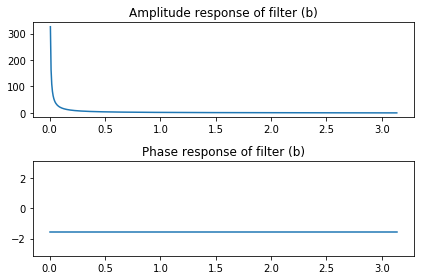

In [3]:
B = [1, 1]
A = [1, -1]

w, h = freqz(B, A)
plt.subplot(211)
plt.plot(w, np.abs(h))
plt.title('Amplitude response of filter (b)')
plt.subplot(212)
plt.plot(w, np.angle(h))
plt.ylim(-np.pi, np.pi)
plt.title('Phase response of filter (b)')
plt.tight_layout()

**2. Prove that the frequency response**

$H(e^{j\omega T}) = e^{-16.5j\omega T}$

**does not correspond to a finite impulse response.**

_Informal:_ The [shift theorem](https://ccrma.stanford.edu/~jos/filters/Shift_Theorem.html) tells us that a frequency response of $e^{-16.5j\omega T}$ corresponds to a delay of $\Delta = 16.5$ samples. Since $\Delta$ must be an integer to be implemented as a FIR filter, this response must not correspond to a FIR filter.

_More formal:_

If $H(e^{j\omega T}) = e^{-16.5j\omega T}$ corresponss to a finite impulse response, then there must be some finite number of constants $b_m$ such that

$\begin{align}
\sum_\limits{m=0}^\limits{M}b_me^{-j\omega m T} &= e^{-16.5j\omega T}\\
\sum_\limits{m=0}^\limits{M}b_m\left(e^{-j\omega T}\right)^m &= \left(e^{-j\omega T}\right)^{16.5}.
\end{align}$

Since $m \in \mathbb{N}$, this is not possible.

**3. _Symmetric FIR Filter:_ Consider the impulse response $h(n) = \delta(n) + \delta(n-1)$. Find the**

**a) phase delay $P(\omega)$**

$\begin{align}
P(\omega) &\triangleq -\frac{\Theta(\omega)}{\omega}\\
&\triangleq -\frac{\angle H\left(e^{j\omega T}\right)}{\omega}\\
&\triangleq -\frac{\angle\left[\sum_\limits{n=0}^\limits{\infty}h(n)e^{-j\omega nT}\right]}{\omega}\\
&\triangleq -\frac{\angle\left[\sum_\limits{n=0}^\limits{\infty} \left(\delta(n) + \delta(n-1)\right)e^{-j\omega nT}\right]}{\omega}\\
&= -\frac{\angle\left[1 + e^{-j\omega T}\right]}{\omega} = -\frac{\angle\left[(e^{j\omega T/2} + e^{-j\omega T/2})e^{-j\omega T/2}\right]}{\omega}\\
&= -\frac{\angle\left[2\cos(\omega T/2)e^{-j\omega T/2}\right]}{\omega}\\
&= -\frac{-\omega T/2}{\omega} = \frac{T}{2}
\end{align}$

**b) Group delay $D(\omega)$**

$\begin{align}
D(\omega) &\triangleq -\frac{d}{d\omega}\Theta(\omega)\\
&= -\frac{d}{d\omega}\left(-\frac{\omega T}{2}\right)\\
&= \frac{T}{2}
\end{align}$

**Explain how they differ and why.**

They _don't_ differ! They're the exact same, because this symmetric lowpass filter has a linear phase response (whose behavior does not change depending on frequency).  Thus, the group delay will also be constant.

**4. _Antisymmetric FIR Filter:_ Consider the antisymmetric impulse response $h(n) = \delta(n) - \delta(n-1)$. Find the**

**a) phase delay $P(\omega)$**

_(I am skipping steps identical to problem 3.)_

$\begin{align}
P(\omega) &\triangleq -\frac{\angle\left[\sum_\limits{n=0}^\limits{\infty} \left(\delta(n) - \delta(n-1)\right)e^{-j\omega nT}\right]}{\omega}\\
&= -\frac{\angle\left[1 - e^{-j\omega T}\right]}{\omega} = -\frac{\angle\left[(e^{j\omega T/2} - e^{-j\omega T/2})e^{-j\omega T/2}\right]}{\omega}\\
&= -\frac{\angle\left[2j\sin(\omega T/2)e^{-j\omega T/2}\right]}{\omega}\\
&= -\frac{\angle\left[2\sin(\omega T/2)e^{j(-\omega T/2 + \pi/2)}\right]}{\omega}\\
&= -\frac{-\omega T/2 + \pi/2}{\omega} = \frac{T}{2} - \frac{\pi}{2\omega}
\end{align}$

**b) Group delay $D(\omega)$**

$\begin{align}
D(\omega) &\triangleq -\frac{d}{d\omega}\Theta(\omega)\\
&= -\frac{d}{d\omega}\left(-\frac{\omega T}{2} + \frac{\pi}{2}\right)\\
&= -\frac{d}{d\omega}\left(-\frac{\omega T}{2}\right)\\
&= \frac{T}{2}\\
\end{align}$

**Explain how they differ and why, comparing with your results for Problem 3.**

This _antisymmetric_ filter has a constant group delay, but _not_ a constant phase delay. This is because the phase now has an _offset_ of $\frac{\pi}{2}$, and so simply dividing by the frequency does not remove the frequency dependence of the phase response. Instead, taking the derivative of the phase response considers the global linear slope of the phase response independent of offset.

**5. _Zero-Phase Filter:_ A _zero-phase filter_ is a special case of a linear-phase filter in which the phase slope is $0$. The real impulse response $h(n)$ of a zero-phase filter is _even_. That is, if $h(n) = h(-n)$ (zero-phase condition), the filter is zero-phase. Verify this by showing the impulse response**

$h(n) = b_1\delta(n+1) + b_0\delta(n) + b_1\delta(n-1)$

**has a zero phase response when $b_0, b_1$ are real.**

$\begin{align}
\Theta(\omega) &\triangleq \angle\left[\sum_\limits{n=-\infty}^\limits{\infty} \left(b_1\delta(n+1) + b_0\delta(n) + b_1\delta(n-1)\right)e^{-j\omega nT}\right]\\
&= \angle\left[b_1e^{j\omega T} + b_0 + b_1e^{-j\omega T}\right]\\
&= \angle\left[b_0 + b_1\left(e^{j\omega T} + e^{-j\omega T}\right)\right]\\
&= \angle\left[b_0 + 2b_1\cos(\omega T)\right]\\
&= \begin{cases}\begin{array}{ll}0 &b_0 + 2b_1\cos(\omega T) >= 0,\\\pi &\text{otherwise}\end{array}\end{cases}\\
\end{align}$


This phase response has slope $0$.

**6. _Exponential Decay:_ This problem is concerned with verifying the accuracy of [the rule](https://ccrma.stanford.edu/~jos/filters/Decay_Time_Q_Periods.html) which states that a second-order resonator impulse-response decays 96 percent in $Q$ periods. Prepare a table of actual decays (in percent) for $Q = 0.5, 1, 2, 4, 8$. Add a column giving the difference between this amount of decay and that predicted by the rule of thumb (`1-exp(-pi) = 0.0432139182637723`).**

Welp, this is a pretty ill-defined question and this is the first ever mention of quality factor at all, but here goes:

In the book, in appendis E.7, one form of the resonator transfer function given is

$H(s) \triangleq g\frac{\tilde{s}}{\tilde{s}^2 + \frac{1}{Q}\tilde{s} + 1}$.

$s$ is used instead of $z$ because it is defined continuously and so it uses the Laplace transform instead of the $z$ transform.

$\tilde{s}$ isn't really justified, but it seems to represent something close to the input frequency.

_TODO After messing with this for a bit, I'm going to stop. I don't fully understand the term "periods" here ("the impulse reponse decayse with a sinusoidal radian frequency $\omega_p = \omega_d$ under the exponential envelope. After $Q$ perios at frequency $\omega_p$, ..." ??), or how exactly to choose reasonable ratios of all these free variables related to $Q$ and the poles of the filter. I trust that this will come up again in the series - I'm sure it will come up in the Physical Audio Signal Processing book._

In [4]:
from scipy.signal import lfilter

s_tilde = 3

for Q in [0.5, 1, 2, 4, 8]:
    B = [s_tilde]; A = [s_tilde**2, s_tilde/Q, 1];
    signal_f = 10
    x = [1.0] + [0.0] * 99
    filtered = lfilter(B, A, x)
    print(filtered[int(Q)]) # Nope! not right at all - how to define "periods"?

0.333333333333
-0.111111111111
-0.0277777777778
0.00335969650206
4.30516418279e-05


**7. _Complex Resonator:_ There is nothing mandatory about real coefficients $(a_i, b_i)$ in [Eq. (5.1)](https://ccrma.stanford.edu/~jos/filters/Difference_Equation_I.html#eq:tpnine). Write a program to implement a filter which has the frequency response**

$H(e^{j\omega T}) = \frac{1}{1 - \left(Re^{j\theta_c}\right)e^{-j\omega T}}$.

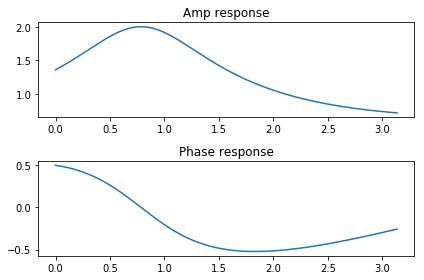

In [5]:
def plot_frequency_response(w, h):
    plt.subplot(211)
    plt.plot(w, np.abs(h))
    plt.title('Amp response')

    plt.subplot(212)
    plt.plot(w, np.angle(h))
    plt.title('Phase response')
    plt.tight_layout()

R = 0.5
theta = np.pi/4
B = [1]; A = [1, -R * np.exp(1j * theta)]
w, h = freqz(B, A)
plot_frequency_response(w, h)

In [6]:
# verify it meets the spec:
expected_h = 1/(1-R*np.exp(1j * theta) * np.exp(-1j * w))
assert((expected_h == h).all())

**8. _Graphic Equalizer:_ Use the trigonometric identity**

$\cos^2(\theta) + \sin^2(\theta) = 1$,

**to design a two-band graphic equalizer which is transparent ($G(\omega)=1$) when the two slide pots are even with each other. Is there any phase distortion caused by this equalizer?**

Here's how I would go about designing this filter based on the material so far:

* Design a filter $F_c$ with the frequency response $G_c(\omega) = \cos(\omega)$.
* Design a filter $F_s$ with the frequency response $G_s(\omega) = \sin(\omega)$.
* Run the signal _in parallel_ through each filter _twice in series_. That is, split the input signal into two paths, running one copy through $F_c$ twice in series, and the other through $F_s$ twice in series. Then, sum the resulting parallel-filtered signals.

Since the frequency responses of filters in _series_ multiply together, and the responses of filters in _parallel_ sum together, we should end up with an end frequency response of $F_{end} = G_c^2(\omega) + G_s^2(\omega) = \cos^2(\omega) + \sin^2(\omega) = 1$.

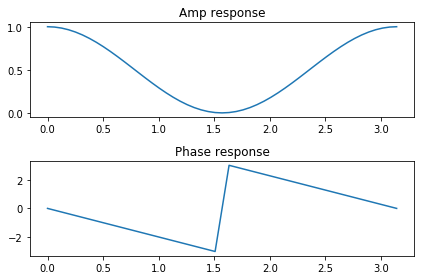

In [17]:
B = [0.5, 0, 0.5]; A = [1]

impulse = [1.0] + [0.0] * 99
h_cos_sq = lfilter(B, A, impulse)
h_cos_sq = lfilter(B, A, h_cos_sq)


H_cos_sq = np.fft.rfft(h_cos_sq)

plot_frequency_response(np.linspace(0, np.pi, len(impulse) // 2 + 1), H_cos_sq)

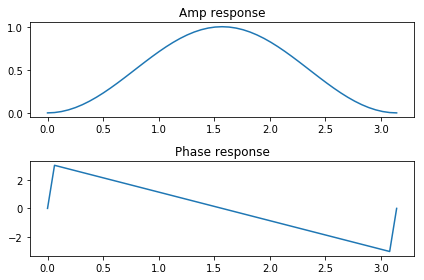

In [8]:
B = [-0.5, 0, 0.5]; A = [1]

h_sin_sq = lfilter(B, A, impulse)
h_sin_sq = lfilter(B, A, h_sin_sq)

H_sin_sq = np.fft.rfft(h_sin_sq)

plot_frequency_response(np.linspace(0, np.pi, len(impulse) // 2 + 1), H_sin_sq)

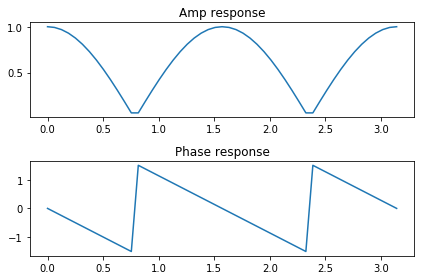

In [9]:
h_parallel = h_cos_sq + h_sin_sq

H_parallel = np.fft.rfft(h_parallel)

plot_frequency_response(np.linspace(0, np.pi, len(impulse) // 2 + 1), H_parallel)

I did not expect that! Here's what's interesting - this actually _is_ the sum of the two frequency responses as expected:

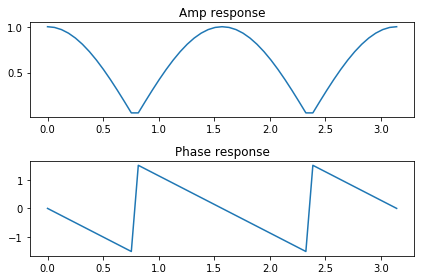

In [10]:
plot_frequency_response(np.linspace(0, np.pi, len(impulse) // 2 + 1), H_cos_sq + H_sin_sq)

However, $\left|H_c + H_s\right| \neq \left|H_c\right| + \left|H_s\right|$ in general for complex signals:

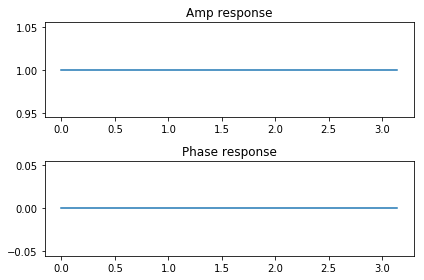

In [11]:
plot_frequency_response(np.linspace(0, np.pi, len(impulse) // 2 + 1), np.abs(H_cos_sq) + np.abs(H_sin_sq))

This is what we wanted. (Ignore the phase - we forced the phase response to be zero by taking the `abs`.) Interesting to learn! (Basically, this design does not meet the constraints - but it is very close and was fun to try!)

Back to the question - I believe a filter like this _would_ necessarily have phase distortion, since the $\sin$ component is not symmetric (not even) and thus will not have zero phase. Running it twice in series will not remove this phase (summing a zero-phase term and a nonzero-phase term will produce a term with some nonzero phase given by the inverse tangent of the result). Running a zero phase filter in parallel with a non-zero-phase filter will not make the resulting spectrum zero phase either, since the resulting spectra will be multiplied and thus their phases will be added.

_(Caveat, the above is hand-wavey. It's times like these I wish there were solutions available! Please let me know if you read this and disagree! These questions are quite advanced for me.)_

**9. _Two Types of Comb Filter:_ Find the frequency response of**

$y(n) = b_0x(n) + b_Mx(n-M)$,

**where $M > 1$ is some integer. (If $M$ varies with time, we get a _flanger_).**

$\begin{align}
H(e^{j\omega T}) &= B(e^{j\omega T}) = \sum_\limits{m=0}^\limits{M}b_me^{-j\omega mT}\\
&= b_0 + b_Me^{-j\omega MT}\\
&= b_0 + b_Me^{-j\omega MT}\\
\end{align}$

**For $b_0 = b_M = b$, find a general formula for the number of notches and the notch frequencies as a function of $M$.**

Setting $b_0 = b_M = b$, we first need to find the frequency response in polar form:

$\begin{align}
H(e^{j\omega T}) &= b_0 + b_Me^{-j\omega MT}\\
&= b(1 + e^{-j\omega MT})\\
&= b(e^{j\omega MT/2} + e^{-j\omega MT/2})e^{-j\omega MT/2}\\
&= 2b\cos(\omega MT/2)e^{-j\omega MT/2}\\
\end{align}$

The notches will be found where the _magnitude_ is equal to $0$.

$\begin{align}
0 &= G(\omega)\\
&= \left|2b\cos(\omega MT/2)e^{-j\omega MT/2}\right|\\
&= 2\left|b\right|\cdot\left|\cos(\omega MT/2)\right|\\
&= \left|\cos(\omega MT/2)\right|\\
\end{align}$

Thus, notch frequencies will occur whenever

$\begin{array}{rl}\cos(\omega MT/2) &= 0\\
\frac{\omega MT}{2} &= \frac{\pi}{2} + N\pi &N \in \mathbb{Z}\\
\omega MT &= \pi + 2\pi N\\
\omega &= \frac{\pi + 2\pi N}{M T} &N \in \mathbb{Z}.\\
\end{array}$.

Our general formula for the notch frequencies as a function of $M$ is thus

$\omega_\text{notch}(M) = \frac{\pi\left(1 + 2N\right)}{M T}, N \in \mathbb{Z}$.

The number of notches is of course infinite, but the number of _unaliased_ notches within the range $\omega T \in [-\pi, \pi)$ will be the number of distinct values of $N$ satisfying

$\begin{array}{rl}
M\omega T &= \pi + 2\pi N, &N \in \mathbb{Z}, \omega T \in [-\pi, \pi)\\
N &= \frac{M\omega T - \pi}{2\pi}, &N \in \mathbb{Z}, \omega T \in [-\pi, \pi)\\
\frac{-\pi M - \pi}{2\pi} \leq N &< \frac{\pi M - \pi}{2\pi}, &N \in \mathbb{Z}\\
\frac{-M - 1}{2} \leq N &< \frac{M - 1}{2}, &N \in \mathbb{Z}\\
\end{array}$.

The number of integers satisfying this constraing will be 

$n_\text{notches}(M) = M$.

(I verify this graphically in an animation below.)

**Next try the following filter:**

$y(n) = b_0x(n) - a_My(n-M)$

$\begin{align}
H(e^{j\omega T}) &= \frac{\sum_\limits{m=0}^\limits{M}b_me^{-j\omega mT}}{\sum_\limits{n=0}^\limits{N}a_ne^{-j\omega mT}}\\
&= \frac{b_0}{1 + a_Me^{-j\omega MT}}\\
\end{align}$

**For $b_0 = -a_M = a$, find an expression for the number of peaks and the peak frequencies as a function of $M$.**

Setting $b_0 = -a_M = a$ and finding the amplitude response:

$\begin{align}
G(\omega) &= \left|H(e^{j\omega T})\right|\\
&= \left|\frac{b_0}{1 + a_Me^{-j\omega MT}}\right| = \left|\frac{a}{1 - ae^{-j\omega MT}}\right| = \left|\frac{ae^{j\omega MT}}{e^{j\omega MT} - a}\right| = \frac{\left|ae^{j\omega MT}\right|}{\left|e^{j\omega MT} - a\right|}\\
&= \frac{\left|a\right|}{\sqrt{\left(\cos(\omega MT) - a\right)^2 + \sin^2(\omega MT)}}\\
&= \frac{\left|a\right|}{\sqrt{\cos^2(\omega MT) - 2a\cos(\omega MT) + a^2 + \sin^2(\omega MT)}}\\
&= \frac{\left|a\right|}{\sqrt{1 - 2a\cos(\omega MT) + a^2}}\\
\end{align}$

The peak frequencies will be found where the denominator is the smallest.

$\begin{array}{ll}
\omega_\text{peak}(M) &= argmin_\omega\left\{\sqrt{1 - 2a\cos(\omega MT) + a^2}\right\}\\
&= argmin_\omega\left\{1 - 2a\cos(\omega MT) + a^2\right\}\\
&= argmin_\omega\left\{-\cos(\omega MT)\right\}\\
&= argmax_\omega\left\{\cos(\omega MT)\right\}\\
&= \frac{2\pi N}{MT}, N \in \mathbb{Z}\\
\end{array}$

The number of peaks in the range $\omega T \in [-\pi, \pi)$ will be the number of distinct values of $N$ satisfying

$\begin{array}{rl}
M\omega T &= 2\pi N, &N \in \mathbb{Z}, \omega T \in [-\pi, \pi)\\
N &= \frac{M\omega T}{2\pi}, &N \in \mathbb{Z}, \omega T \in [-\pi, \pi)\\
\frac{-\pi M}{2\pi} \leq N &< \frac{\pi M}{2\pi}, &N \in \mathbb{Z}\\
\frac{-M}{2} \leq N &< \frac{M}{2}, &N \in \mathbb{Z}\\
\end{array}$.

The number of integers satisfying this constraing will be 

$n_\text{peaks}(M) = M$.

**How does this all-pole comb filter compare to the all-zero comb filter above? How do the peak gains compare when $a=b$? (The peak gain is defined as the maximum value assumed by the amplitude response $G(\omega)$ over all $\omega \in [-\pi, \pi]$.)**

To summarize, the notch frequencies for the all-zeros filter in the first part occur at frequencies

$\begin{array}{ll}\omega_\text{notch}(M) = \frac{\pi}{MT} + \frac{2N}{MT}, &\frac{-M - 1}{2} \leq N < \frac{M - 1}{2}\end{array}$,

while the peak frequencies for the all-poles filter in the second part are at frequencies

$\begin{array}{ll}\omega_\text{peak}(M) = \frac{2\pi N}{MT}, &\frac{-M}{2} \leq N < \frac{M}{2}\end{array}$.

The number (non-aliased) notch and peak frequencies of both filters respectively are $M$.

The following animation shows the amplitude and phase responses, along with the expected notch/peak frequencies, for increasing $M$ (note that only half the peaks/notches are shown since we only show the range $\omega T \in [0, \pi]$):

In [12]:
import sys
sys.path.append('../')

from ipython_animation import create_animation, DEFAULT_FPS

In [13]:
animation_length_sec = 2
FPS = 10
fig, axes = plt.subplots(2, figsize=(10, 8))

MAX_M = animation_length_sec * FPS

w, h = freqz([1], [1])
amplitude_line, = axes[0].plot(w, np.abs(h), c='red')
notch_lines = [axes[0].axvline(x=-1) for M in range(MAX_M)] # draw offscreen at start
phase_line, = axes[1].plot(w, np.angle(h), c='green')
axes[0].set_xlim(w[0] - 0.1, w[-1] + 0.1)
axes[0].set_ylim(0, 2.1)
axes[1].set_ylim(-np.pi, np.pi)
axes[1].set_yticks([-np.pi, 0, np.pi])
axes[1].set_yticklabels(['$-\\pi$', 0, '$\\pi$'])

def animate(i):
    M = i + 1

    b = 1
    B = [1] + [0] * (M - 1) + [b]; A = [1]
    w, h = freqz(B, A)

    amplitude_line.set_ydata(np.abs(h))
    axes[0].set_title('Amplitude response of $y(n) = %0.1fx(n) + %0.1fx(n-%d)$\nwith expected notches' % (b, b, M))
    axes[0].set_xlabel('Frequency (rad/sample)')

    phase_line.set_ydata(np.angle(h))
    axes[1].set_title('Phase response of $y(n) = %0.1fx(n) + %0.1fx(n-%d)$' % (b, b, M))
    axes[1].set_xlabel('Frequency (rad/sample)')

    expected_notch_frequencies = np.pi * (1 + 2 * np.arange(M)) / M

    for i in range(M):
        notch_lines[i].set_xdata(expected_notch_frequencies[i])
    plt.tight_layout()

create_animation(fig, plt, animate, length_seconds=animation_length_sec, frames_per_second=FPS)

In [14]:
animation_length_sec = 2
FPS = 10
fig, axes = plt.subplots(2, figsize=(10, 8))

MAX_M = animation_length_sec * FPS

w, h = freqz([1], [1])
amplitude_line, = axes[0].plot(w, np.abs(h), c='red')
peak_lines = [axes[0].axvline(x=-1) for M in range(MAX_M)] # draw offscreen at start
phase_line, = axes[1].plot(w, np.angle(h), c='green')
axes[0].set_xlim(w[0] - 0.1, w[-1] + 0.1)
axes[0].set_ylim(0, 11)
axes[1].set_ylim(-np.pi, np.pi)
axes[1].set_yticks([-np.pi, 0, np.pi])
axes[1].set_yticklabels(['$-\\pi$', 0, '$\\pi$'])

def animate(i):
    M = i + 1

    a = 1.1
    B = [a]; A = [1] + [0] * (M - 1) + [-a]
    w, h = freqz(B, A)

    amplitude_line.set_ydata(np.abs(h))
    axes[0].set_title('Amplitude response of $y(n) = %0.1fx(n) - %0.1fy(n-%d)$\nwith expected peaks' % (a, a, M))
    axes[0].set_xlabel('Frequency (rad/sample)')

    phase_line.set_ydata(np.angle(h))
    axes[1].set_title('Phase response of $y(n) = %0.1fx(n) - %0.1fy(n-%d)$' % (a, a, M))
    axes[1].set_xlabel('Frequency (rad/sample)')

    expected_peak_frequencies = np.pi * 2 * np.arange(M) / M

    for i in range(M):
        peak_lines[i].set_xdata(expected_peak_frequencies[i])
    plt.tight_layout()

create_animation(fig, plt, animate, length_seconds=animation_length_sec, frames_per_second=FPS)

**10. _Allpass Filter:_ Give the conditions necessary on $\{b_0, b_M, a_M\}$ in the previous problem such that the cascade combination of an all-pole and all-zero comb filter will have an amplitude response $G(\omega) = 1$, but a nontrivial phase response.**

A cascade (or series) combination of of LTI filters will multiply the consituent filter frequency responses. In this case, we have

$\begin{align}
G(\omega) &= \left|H_\text{all-zero}(e^{j\omega T})\cdot H_\text{all-pole}(e^{j\omega T})\right|\\
&= \left|\left(b_0 + b_Me^{-j\omega MT}\right)\frac{b_0}{1 + a_Me^{-j\omega MT}}\right|\\
&= \left|\frac{b_0^2 + b_0b_Me^{-j\omega MT}}{1 + a_Me^{-j\omega MT}}\right|\\
\end{align}$

Setting this expression equal to $1$,

$\begin{align}
1 &= \left|\frac{b_0^2 + b_0b_Me^{-j\omega MT}}{1 + a_Me^{-j\omega MT}}\right|\\
\left|1 + a_Me^{-j\omega MT}\right| &= \left|b_0^2 + b_0b_Me^{-j\omega MT}\right|\\
\sqrt{\left(1 + a_M\cos(\omega MT)\right)^2 - a_Mj\sin^2(\omega MT)} &= \sqrt{\left(b_0^2 + b_0b_M\cos(\omega MT)\right)^2 - \left(b_0b_M\sin(\omega MT)\right)^2}\\
\end{align}$

TODO I don't see a general way of making this work out... I know that what we're getting at here is that each pole should be paired with a conjugate-symmetric zero.

**Where are the poles and zeros for this case? What is the simple "all-pass rule" for $b_M$ given a particular $a_M$ and $b_0$? Check your rule by applying it to the numerator coefficients versus the denominator coefficients of a general transfer function and seeing if the transfer function is all-pass. Can you also find the general all-pass rule which specifies the zeroes given the poles or vice versa?**

TODO

**11. Show that**

$\angle\tilde{A}(e^{j\omega T}) = -\angle A(e^{j\omega T}) - N\omega T$,

**where $\tilde{A}(z) \triangleq z^{-N}A(1/z)$ is the polynomial obtained by reversing ("flipping") the coefficients of $A(z)$.**

$\begin{align}
\angle\tilde{A}(e^{j\omega T}) &\triangleq \angle \left[\left(e^{j\omega T}\right)^{-N}A\left(\frac{1}{e^{j\omega T}}\right)\right]\\
&= \angle \left[e^{-jN\omega T}A\left(e^{-j\omega T}\right)\right]\\
&= \angle A\left(e^{-j\omega T}\right) + \angle e^{-jN\omega T}\\
&= -\angle A(e^{j\omega T}) - N\omega T
\end{align}$

**12. Determine the conditions under which Eq. (7.11) on page 170 gives a faster group-delay algorithm than Eq. (7.12).**

TODO